In [ ]:
pip install numpy

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r'C:/Users/User/Desktop/Data Analyst Projects/Customer Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [29]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [31]:
df.isnull().sum().sum()

0

In [37]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

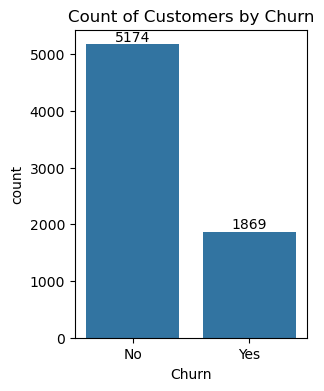

In [41]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='Churn', data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()


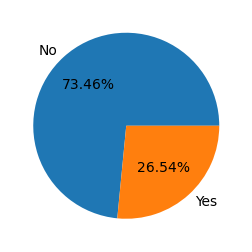

In [99]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()

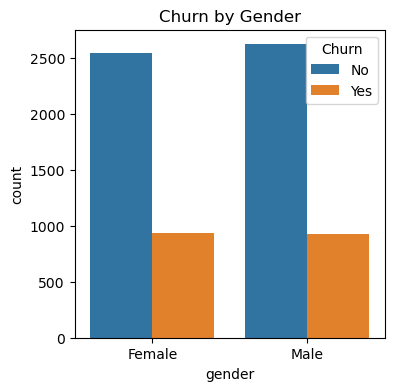

In [103]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data = df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

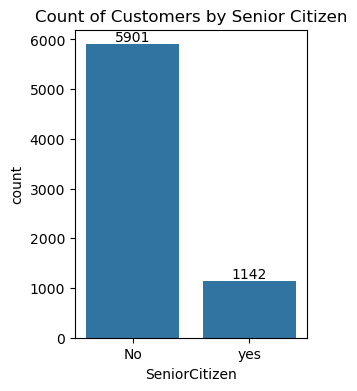

In [107]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='SeniorCitizen', data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

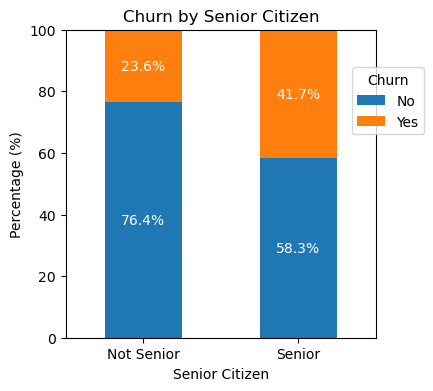

In [122]:
# Calculate counts
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentage
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(4,4))

# Create a stacked bar chart
percentage_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())

# Adding percentage labels
for i in range(len(percentage_data)):
    for j in range(len(percentage_data.columns)):
        plt.text(i, percentage_data.iloc[i, :].cumsum().iloc[j] - percentage_data.iloc[i, j] / 2,
                 f'{percentage_data.iloc[i, j]:.1f}%', ha='center', va='center', color='white')

plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=range(len(percentage_data.index)), labels=['Not Senior', 'Senior'], rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))
plt.ylim(0, 100)  # Set y-axis limit to 100 for percentage
plt.grid(axis='y', linestyle=' ', alpha=0.7)
plt.show()

In [109]:
#Comparative a greater percentage of people in senior citizen category have churned

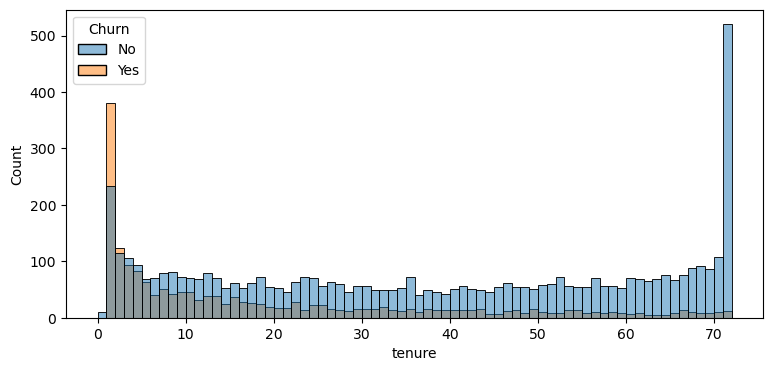

In [51]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df,bins=72,hue="Churn")
plt.show()

In [ ]:
#people who have used our services for a long time have stayed and people who have used our sevices
#1 or 2 months have churned

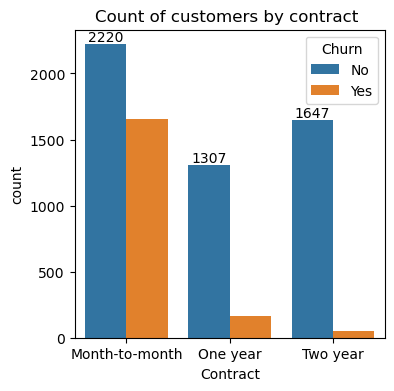

In [124]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract ")
plt.show()

In [126]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

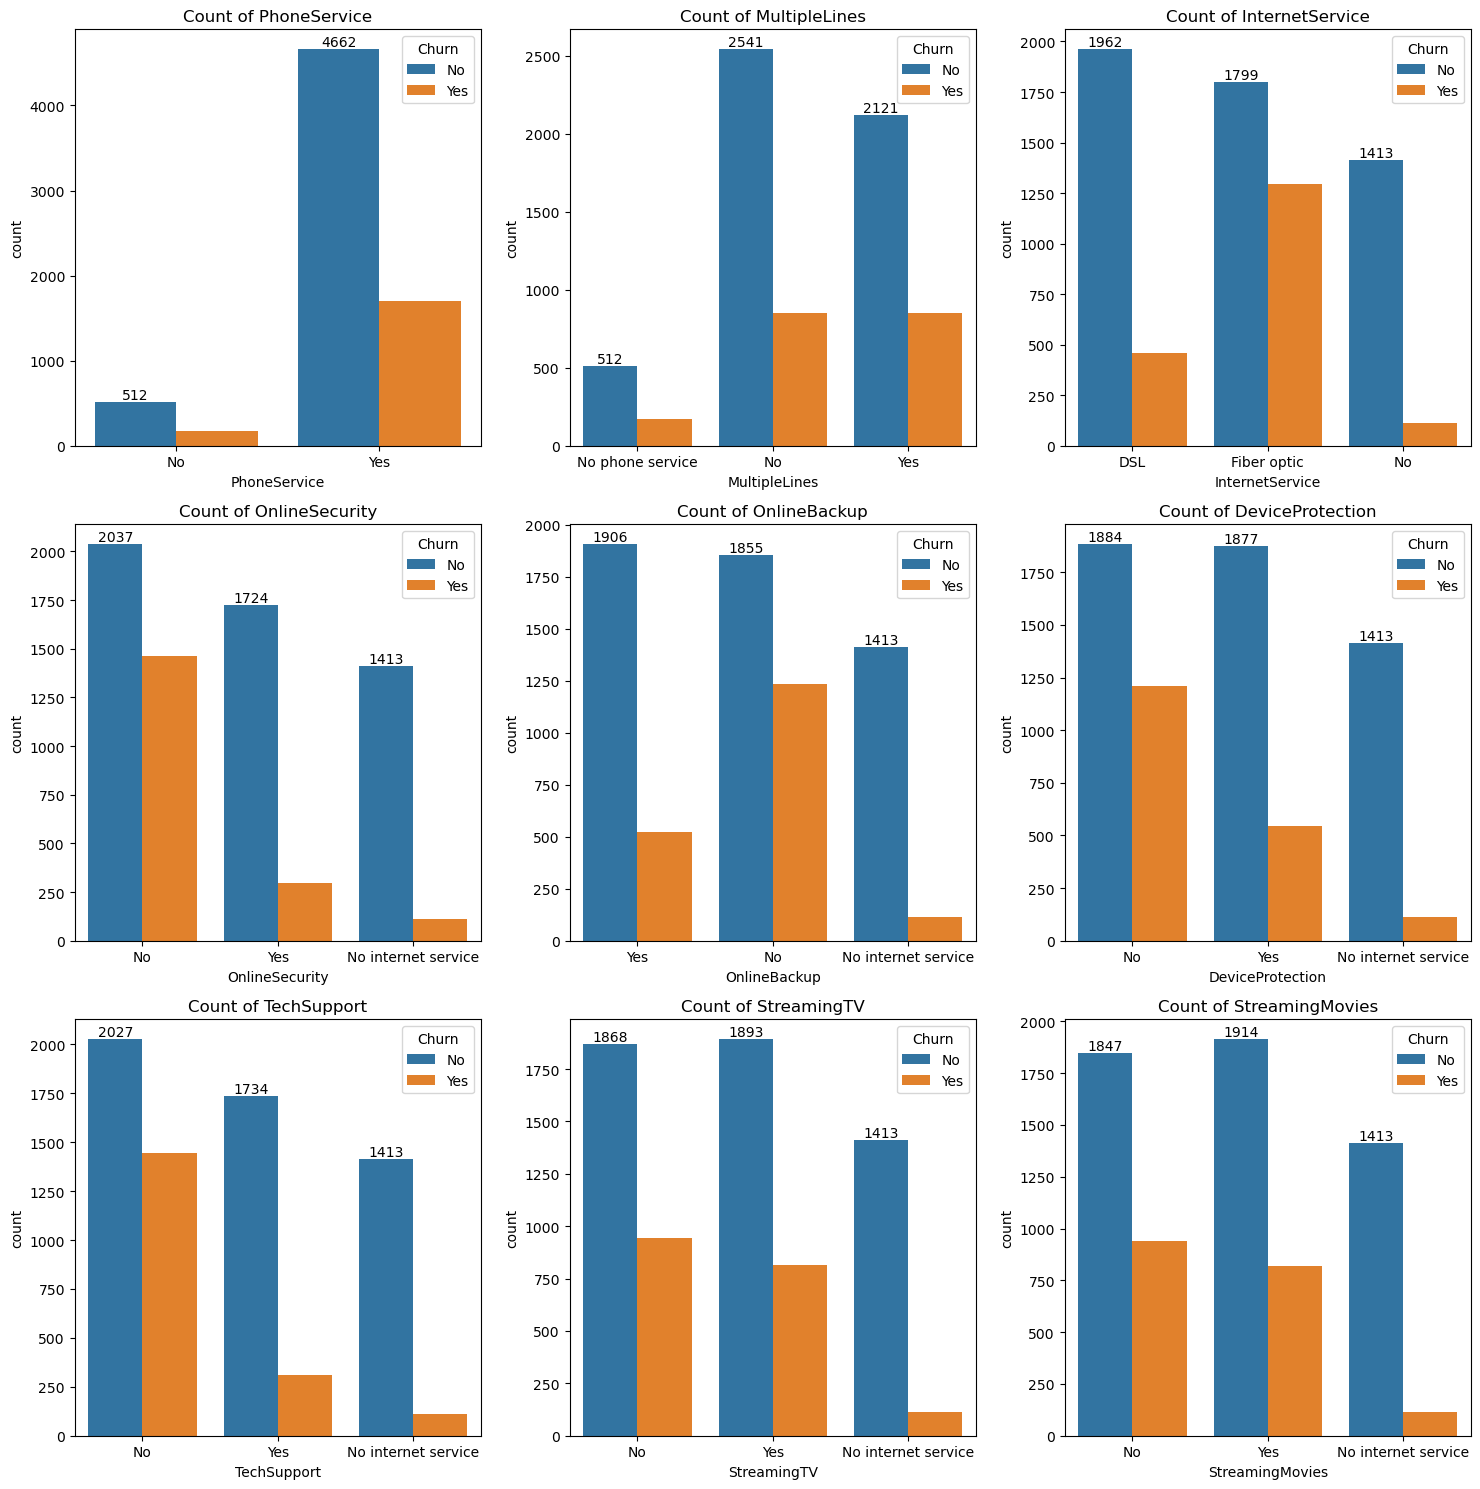

In [73]:
# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots (3 rows x 3 columns grid)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create countplots for each column
for i, column in enumerate(columns):
    ax = sns.countplot(x=column, data=df, ax=axes[i],hue="Churn")  # Create countplot
    ax.set_title(f"Count of {column}")  # Set title for each subplot
    ax.bar_label(ax.containers[0])  # Add labels to the bars

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [128]:
#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

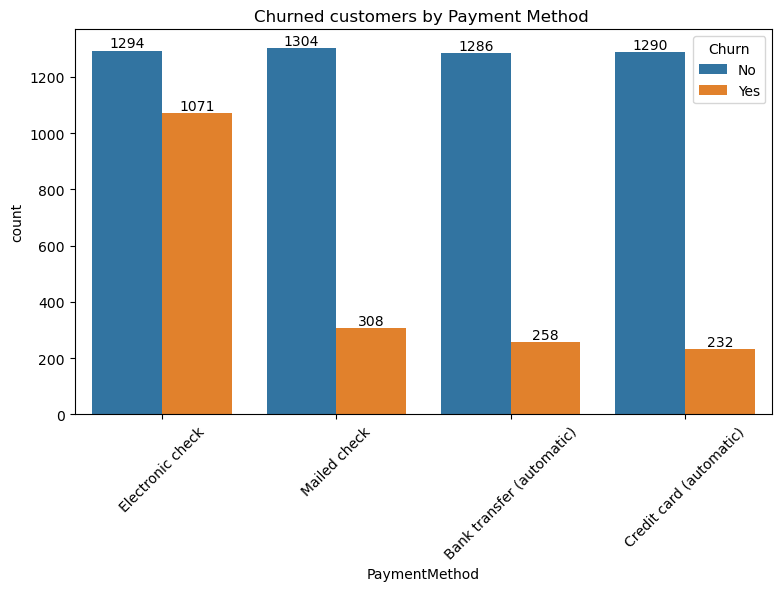

In [93]:
plt.figure(figsize=(9,5))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by Payment Method ")
plt.xticks(rotation=45)
plt.show()

In [130]:
#customer is likely to churn when he is using electronic check as a payment method.